In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Datasets/Mall_Customers.xlsx')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# univariative analysis

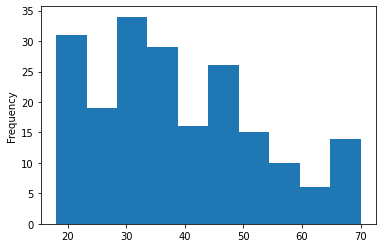

In [ ]:
data['Age'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f99916d6410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99916d6e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99916cfe90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99916de990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99916deed0>],
 'means': []}

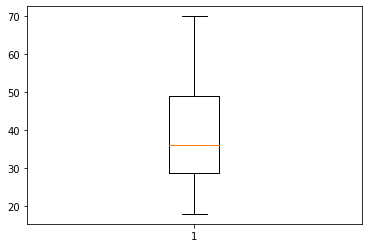

In [ ]:
plt.boxplot(data['Age'])

<BarContainer object of 200 artists>

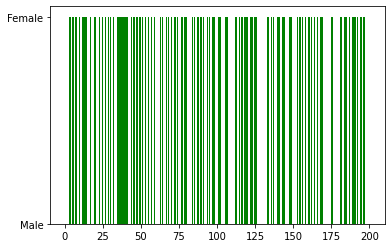

In [ ]:
df=pd.DataFrame(data)
X=list(df.iloc[:,0])
Y=list(df.iloc[:,1])
plt.bar(X,Y,color='g')

In [ ]:
# bivariative analysis

<BarContainer object of 200 artists>

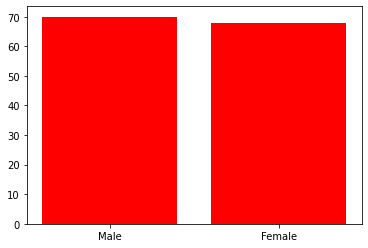

In [ ]:
plt.bar(data['Gender'],data['Age'],color='r')

In [ ]:
# multivariative analysis

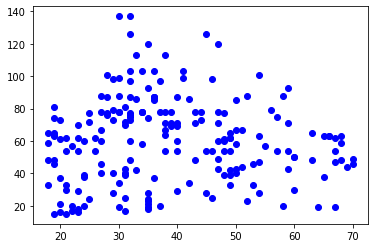

In [ ]:
plt.scatter(data['Age'],data['Annual Income (k$)'],color='b')

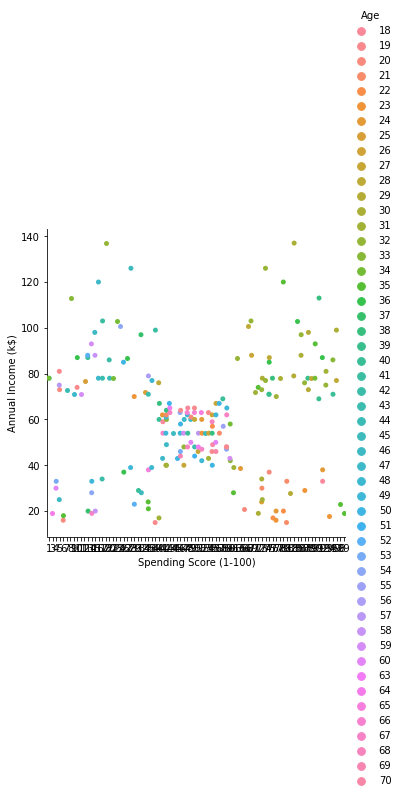

In [ ]:
sns.catplot(data=data,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Age')

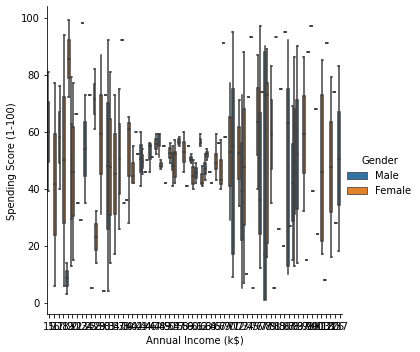

In [ ]:
sns.catplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',kind="box")

In [ ]:
# perform descriptive statistics on the dataset

In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
data.median

<bound method NDFrame._add_numeric_operations.<locals>.median of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.shape

(200, 5)

In [ ]:
# handle the missing values

In [ ]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# find the outliers and replace the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


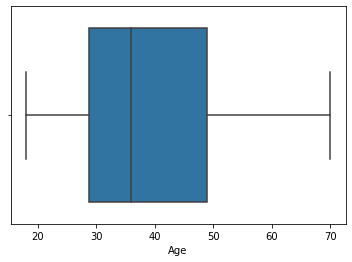

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
qnt=data.quantile(q=[0.25,0.75])
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [ ]:
IQR=qnt.loc[0.75] - qnt.loc[0.25]
IQR

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [ ]:
upper_extreme=qnt.loc[0.75]+1.5*IQR
upper_extreme

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [ ]:
lower_extreme=qnt.loc[0.25]-1.5*IQR
lower_extreme

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [ ]:
df=data[(data['Age']<upper_extreme['Age'])&(data['Age']>lower_extreme['Age'])]

In [ ]:
data.shape

(200, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


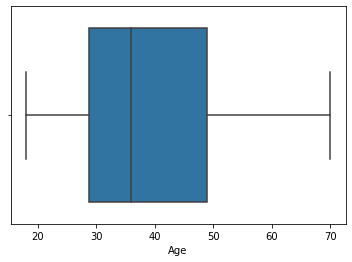

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
# check for categorical columns and perform encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['Spending Score (1-100)']=le.fit_transform(df['Spending Score (1-100)'])

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,30
1,2,Male,21,15,67
2,3,Female,20,16,4
3,4,Female,23,16,64
4,5,Female,31,17,31


In [ ]:
# scaling the data

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x=data.drop(columns=['Gender'],axis=1)
x.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [ ]:
x=scale(x)

In [ ]:
x

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -1.06573534, -1.54815205,  1.04041783],
       [-1.48092195, -0.13276838, -1.54815205, -1.44416206],
       [-1.46360123, -1.20926872, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

In [ ]:
x.mean()

-1.1546319456101628e-16

In [ ]:
x.std()

1.0

In [ ]:
# perform any of the clustering algorithm

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
TWSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    TWSS.append(kmeans.inertia_)

In [ ]:
TWSS

[800.0,
 515.6688891233371,
 375.2643070614756,
 259.69362556823944,
 209.5783837699584,
 160.97567568819875,
 146.66302287394308,
 129.4694198750451,
 116.68243523901893,
 103.95937125647615]

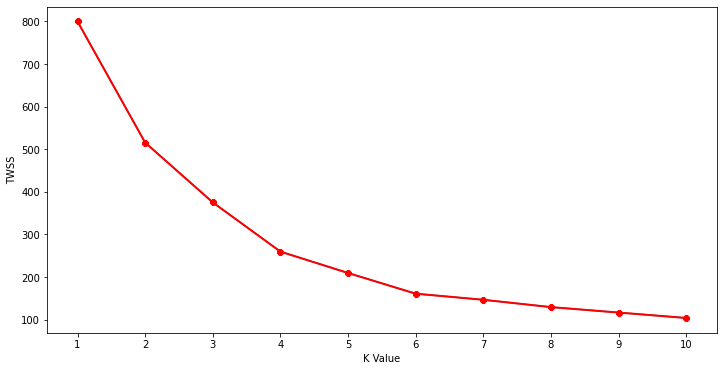

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),TWSS)
plt.plot(range(1,11),TWSS, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("TWSS")
plt.show()

In [ ]:
model=KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
mb=pd.Series(model.labels_)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# add the clusters data with the primary dataset

In [ ]:
data['clust']=mb

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1
199,200,Male,30,137,83,1


In [ ]:
data.to_csv('kmeans_Mall_customers.csv',encoding='utf-8')

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# split the data into depandent and independent variables

In [ ]:
x=df['Annual Income (k$)']
y=df.drop(columns=['Annual Income (k$)'],axis=1)

In [ ]:
x.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual Income (k$), dtype: int64

In [ ]:
y.head()

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,Male,19,30
1,2,Male,21,67
2,3,Female,20,4
3,4,Female,23,64
4,5,Female,31,31


In [ ]:
x=scale(x)
x

array([-1.73899919, -1.73899919, -1.70082976, -1.70082976, -1.66266033,
       -1.66266033, -1.62449091, -1.62449091, -1.58632148, -1.58632148,
       -1.58632148, -1.58632148, -1.54815205, -1.54815205, -1.54815205,
       -1.54815205, -1.50998262, -1.50998262, -1.43364376, -1.43364376,
       -1.39547433, -1.39547433, -1.3573049 , -1.3573049 , -1.24279661,
       -1.24279661, -1.24279661, -1.24279661, -1.20462718, -1.20462718,
       -1.16645776, -1.16645776, -1.05194947, -1.05194947, -1.05194947,
       -1.05194947, -1.01378004, -1.01378004, -0.89927175, -0.89927175,
       -0.86110232, -0.86110232, -0.82293289, -0.82293289, -0.82293289,
       -0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
       -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
       -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
       -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
       -0.47940803, -0.47940803, -0.47940803, -0.47940803, -0.47

In [ ]:
# split the data into trainig and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

array([ 0.66567484,  1.390894  ,  0.36031941, -0.02137488,  0.93286085,
        0.78018313,  0.97103028, -1.3573049 , -1.24279661,  0.78018313,
       -1.62449091,  1.04736914,  1.54357172,  0.70384427,  0.09313341,
        0.09313341, -0.86110232,  0.55116656,  1.42906343, -0.02137488,
       -1.20462718, -1.70082976, -1.01378004, -0.25039146,  0.16947227,
        1.00919971,  0.4748277 ,  0.01679455, -1.66266033, -1.16645776,
       -0.05954431,  1.61991057, -0.05954431, -1.43364376,  2.91767117,
        0.55116656, -0.70842461, -0.25039146,  0.39848884,  0.39848884,
       -0.55574689, -1.05194947, -1.3573049 ,  0.62750542, -0.47940803,
        1.04736914, -0.67025518,  0.66567484,  0.39848884,  1.61991057,
       -0.86110232, -0.55574689,  0.24581112,  0.32214998, -0.47940803,
        0.05496398, -0.67025518, -1.50998262,  0.13130284, -1.54815205,
       -0.4412386 ,  1.23821628,  0.4748277 , -0.67025518,  0.05496398,
        0.66567484,  0.58933599,  0.66567484, -0.47940803,  0.51

In [ ]:
x_train.shape

(160,)

In [ ]:
x_test

array([ 0.66567484,  2.91767117, -1.05194947, -0.89927175, -1.54815205,
        0.43665827,  1.390894  ,  0.05496398, -1.24279661,  0.13130284,
        1.42906343,  1.23821628,  0.62750542, -0.82293289, -0.47940803,
       -0.25039146,  0.09313341, -1.43364376, -0.02137488,  0.09313341,
        1.00919971, -0.09771374, -1.73899919, -0.02137488, -1.24279661,
       -1.66266033,  0.66567484, -0.25039146, -0.67025518, -1.54815205,
       -0.78476346, -0.63208575,  0.32214998, -0.40306917, -1.58632148,
       -0.25039146,  0.09313341,  0.16947227,  1.61991057, -0.47940803])

In [ ]:
x_test.shape

(40,)

In [ ]:
y_train

,CustomerID,Gender,Age,Spending Score (1-100)
151,152,Male,39,73
180,181,Female,37,26
125,126,Female,31,64
95,96,Male,24,43
164,165,Male,50,21
...,...,...,...,...
169,170,Male,32,53
78,79,Female,23,43
85,86,Male,48,37
49,50,Female,31,33


In [ ]:
y_train.shape

(160, 4)

In [ ]:
y_test

,CustomerID,Gender,Age,Spending Score (1-100)
153,154,Female,38,63
198,199,Male,32,16
32,33,Male,53,2
39,40,Female,20,62
15,16,Male,22,66
132,133,Female,25,27
181,182,Female,32,71
101,102,Female,49,39
25,26,Male,29,68
112,113,Female,38,33


In [ ]:
y_test.shape

(40, 4)

In [ ]:
# build the model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [ ]:
# train the model

In [ ]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# test the model on prediction

In [ ]:
lin_reg.predict(x)

array([[-1.73899919],
       [-1.73899919],
       [-1.70082976],
       [-1.70082976],
       [-1.66266033],
       [-1.66266033],
       [-1.62449091],
       [-1.62449091],
       [-1.58632148],
       [-1.58632148],
       [-1.58632148],
       [-1.58632148],
       [-1.54815205],
       [-1.54815205],
       [-1.54815205],
       [-1.54815205],
       [-1.50998262],
       [-1.50998262],
       [-1.43364376],
       [-1.43364376],
       [-1.39547433],
       [-1.39547433],
       [-1.3573049 ],
       [-1.3573049 ],
       [-1.24279661],
       [-1.24279661],
       [-1.24279661],
       [-1.24279661],
       [-1.20462718],
       [-1.20462718],
       [-1.16645776],
       [-1.16645776],
       [-1.05194947],
       [-1.05194947],
       [-1.05194947],
       [-1.05194947],
       [-1.01378004],
       [-1.01378004],
       [-0.89927175],
       [-0.89927175],
       [-0.86110232],
       [-0.86110232],
       [-0.82293289],
       [-0.82293289],
       [-0.82293289],
       [-0

In [ ]:
def viz_linear():
  sns.scatter(x,y,color='red')
  sns.plot(x,prediction,color='blue')

  viz_linear()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


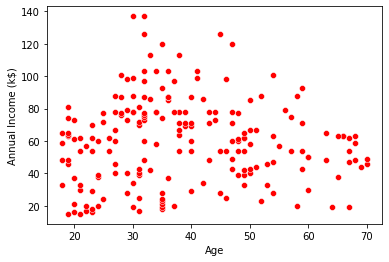

In [ ]:
sns.scatterplot(df['Age'],df['Annual Income (k$)'],color='red')

In [ ]:
# measure the performance using evaluation metrices

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
metrics.r2_score(y,prediction)

1.0

In [ ]:
np.sqrt(mean_squared_error(y,prediction))

6.779519510154381e-16

In [ ]:
metrics.r2_score(y,prediction)

1.0

In [ ]:
print('R_squared:',metrics.r2_score(y,prediction))
print('MSE:',mean_squared_error(y,prediction))
print('RMSE:',np.sqrt(mean_squared_error(y,prediction)))

R_squared: 1.0
MSE: 4.59618847885639e-31
RMSE: 6.779519510154381e-16
